In [1]:
from PIL import Image # used for loading images
import numpy as np
import os # used for navigating to image path
import imageio # used for writing images
import random

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
def label_img(name):
  word_label = name.split('-')[0]
  if word_label == 'probable' : 
        return np.array([1, 0, 0])
  elif word_label == 'possible' : 
        return np.array([0, 1, 0])    
  elif word_label == 'improbable' : 
        return np.array([0, 0, 1])

In [20]:
#IMG_SIZE = 300
DIR = '../../data/tidy/labeled_images_3_classes'
def load_training_data(l=400,t=0,r=3424,b=3024):
    data = []
    image_list = os.listdir(DIR)
    #training_image_list = random.sample(image_list, int(.9*len(image_list))) # take 90% of image data for traing
    for img in image_list:
        label = label_img(img)
        path = os.path.join(DIR, img)
        #print(path)
        img = Image.open(path)
        img = img.convert('L') # convert image to monochrome 
        #print(img.size)
        img = img.crop((l, t, r, b)) 
        img_size_w, img_size_h = img.size
        #print(img_size_w)
        img_size = int(img_size_w/28)        
        img = img.resize((img_size, img_size), Image.BICUBIC)
        data.append([(np.array(img)/255.).T, label])#scale to 0-1 and transpose
#     # Basic Data Augmentation - Horizontal Flipping
#     flip_img = Image.open(path)
#     flip_img = flip_img.convert('L')
#     flip_img = flip_img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
#     flip_img = np.array(flip_img)
#     flip_img = np.fliplr(flip_img)
#     train_data.append([flip_img, label])  
#    shuffle(train_data)
    return (data)

In [21]:
processed_image_data = load_training_data()

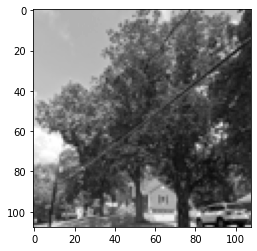

In [40]:
plt.imshow(processed_image_data[0][0], cmap = 'gist_gray')

In [23]:
def split_data(image_array, prop=0.80):
    random.shuffle(image_array)
    train_size = int(prop*np.shape(image_array)[0])
    train = image_array[:train_size]
    test = image_array[train_size:]
    return(train, test)

In [24]:
train_data, test_data = split_data(processed_image_data)

In [37]:
input_image_shape = np.array([np.expand_dims(x[0],axis=2) for x in train_data]).shape[1:4]
print(input_image_shape)

(108, 108, 1)


In [38]:
model = models.Sequential([
    layers.Conv2D(64, 7, strides=2,activation="relu", padding="same", input_shape = input_image_shape),
    layers.MaxPooling2D(2),
    layers.Conv2D(128, 3, activation="relu", padding="same"),
    layers.Conv2D(128, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(2),
    layers.Conv2D(256, 3, activation="relu", padding="valid"),
    layers.Conv2D(256, 3, activation="relu", padding="valid"),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(3, activation="softmax")
])

# model = Sequential()
# model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# #model.add(Dropout(0.3))
# model.add(Dense(2, activation = 'softmax'))

# Compile the model.
model.compile('rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
# Train the model.
model.fit(
    np.array([np.expand_dims(x[0],axis=2) for x in train_data]), # images
    np.array([x[1] for x in train_data]), # labels
    epochs=10,
    validation_data=(
        np.array([np.expand_dims(x[0],axis=2) for x in test_data]), 
        np.array([x[1] for x in test_data])),
)

Epoch 1/10
10/10 [==============================] - 5s 547ms/step - loss: 1.4832 - accuracy: 0.6228 - val_loss: 0.7576 - val_accuracy: 0.7397
Epoch 2/10
10/10 [==============================] - 5s 540ms/step - loss: 0.8712 - accuracy: 0.6990 - val_loss: 2.0321 - val_accuracy: 0.7397
Epoch 3/10
10/10 [==============================] - 5s 539ms/step - loss: 1.2010 - accuracy: 0.6851 - val_loss: 0.9240 - val_accuracy: 0.7397
Epoch 4/10
10/10 [==============================] - 5s 522ms/step - loss: 0.8758 - accuracy: 0.6990 - val_loss: 0.9594 - val_accuracy: 0.7397
Epoch 5/10
10/10 [==============================] - 5s 535ms/step - loss: 0.8714 - accuracy: 0.7059 - val_loss: 0.7896 - val_accuracy: 0.7397
Epoch 6/10
10/10 [==============================] - 5s 524ms/step - loss: 0.8796 - accuracy: 0.7093 - val_loss: 0.8143 - val_accuracy: 0.7397
Epoch 7/10
10/10 [==============================] - 5s 506ms/step - loss: 0.8410 - accuracy: 0.7059 - val_loss: 0.8847 - val_accuracy: 0.7397
Epoch 

In [ ]:
#loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
#print(acc * 100)